In [147]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

In [148]:
df = pd.read_csv('../data/placement.csv')

In [149]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package')

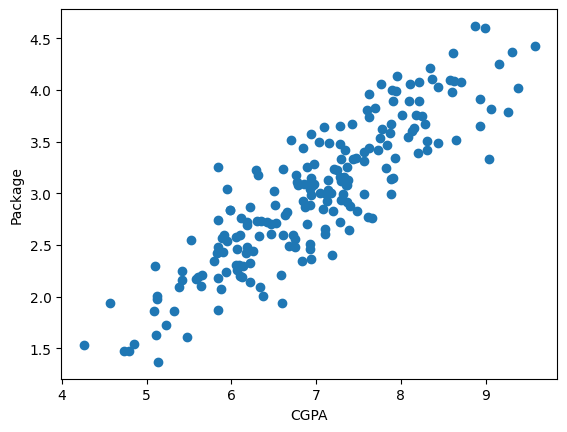

In [150]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel("CGPA")
plt.ylabel("Package")

In [151]:
X=df.iloc[:,0:1]
Y=df.iloc[:,-1]

In [152]:
X.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [153]:
Y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

In [154]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=2)

In [155]:
from sklearn.linear_model import LinearRegression

In [156]:
lr = LinearRegression()

In [157]:
lr.fit(X_train,y_train)

LinearRegression()

In [158]:
lr.predict(X_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

We know y

y = m * x + b

So,

Package = m * cgpa + b

In [159]:
m = lr.coef_
m

array([0.55795197])

In [160]:
b = lr.intercept_
b

-0.8961119222429144

In [161]:
y = m *X_test+b
y.head()

,cgpa
112,3.891116
29,3.093245
182,2.384646
199,2.574349
193,1.653729


Text(0, 0.5, 'Package')

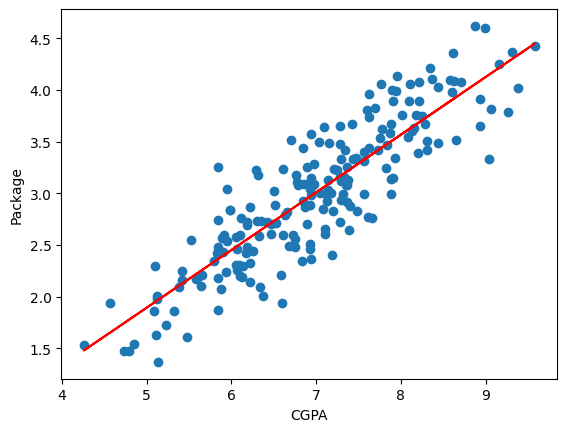

In [162]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train,lr.predict(X_train), color='red')
plt.xlabel("CGPA")
plt.ylabel("Package")

### Simple linear regression

⍺ = b

ꞵ = m







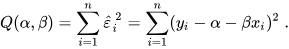

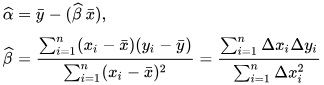


In [163]:
class MyLR:
    def __init__(self) -> None:
        self.m=None
        self.b=None

    def fit(self,X_train, y_train):
        nim=0
        dim=0
        for i in range(X_train.shape[0]):
            nim = nim + ((X_train.iloc[i]- X_train.mean())*(y_train.iloc[i]-y_train.mean()))
            dim = dim + ((X_train.iloc[i]- X_train.mean())*(X_train.iloc[i]-X_train.mean()))
        
        self.m = nim/dim
        self.b = y_train.mean() - (self.m * X_train.mean())


    def predict(self,X_test):
        return self.m *X_test + self.b

In [164]:
lr = MyLR()

In [165]:
lr.fit(X_train,y_train)

In [166]:
lr.predict(X_test).head()

,cgpa
112,3.891116
29,3.093245
182,2.384646
199,2.574349
193,1.653729
